# Final Project 1 : Linear Regression

Kelompok 3 :

1. Andrea Natania (PYTN-KS17-04)
2. Muhammad Al-Abrour (PYTN-KS17-013)
3. Rofyan Luthfi Mafaza (PYTN-KS17-015)
4. Mufidah Nur Amaliah (PYTN-KS17-021)

## A. Perkenalan

Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta jiwa setiap tahunnya, atau menyumbang 31% dari seluruh kematian di seluruh dunia.
Gagal jantung merupakan kejadian umum yang disebabkan oleh penyakit kardiovaskular dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

Untuk memprediksi kematian akibat gagal jantung, akan digunakan metode modelling menggunakan Random Forest, dan hyperparameter tuning menggunakan GridSearchCV

## B. Import Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import skew

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import sys

import pickle

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline
sns.set(style='darkgrid')

## C. Data Loading

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.000000,0,61,1,38,1,155000.000000,1.100000,143,1,1,270,0
295,55.000000,0,1820,0,38,0,270000.000000,1.200000,139,0,0,271,0
296,45.000000,0,2060,1,60,0,742000.000000,0.800000,138,0,0,278,0
297,45.000000,0,2413,0,38,0,140000.000000,1.400000,140,1,1,280,0


In [3]:
df.shape

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## D. Data Cleaning

In [5]:
df.duplicated().sum()

0

Dari pengecekan diatas, dataset tidak memiliki data duplikat

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dari pengecekan diatas, data tidak memiliki null data.

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.034510,4.412477,0.478136,0.467670,77.614208,0.467670
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


- Umur termuda pasien adalah umur 40 dan tertua 95 tahun dengan rata rata sebesar 60 tahun.
- Level Creatinine Phosphokinasi terendah pasien adalah sebesar 23, dan tertinggi sebesar 7861 dengan rata rata sebesar 581.84.
- Rata-rata ejection fraction adalah sebesar 38.08 dengan nilai minimum 14 dan maximum 80
- Jumlah platelets terkecil adalah sebesar 25100 dan terbesar adalah 850000 dengan rata rata jumlah platelets sebesar 263358.02
- Level serum creatinine terkecil adalah sebesar 0.5 dan terbesar di angka 9.4, dengan rata rata sebesar 1.39
- Tingkat serum_sodium terkecil adalah sebesar 113 dan tertinggi sebesar 148 dengan rata rata 136.63

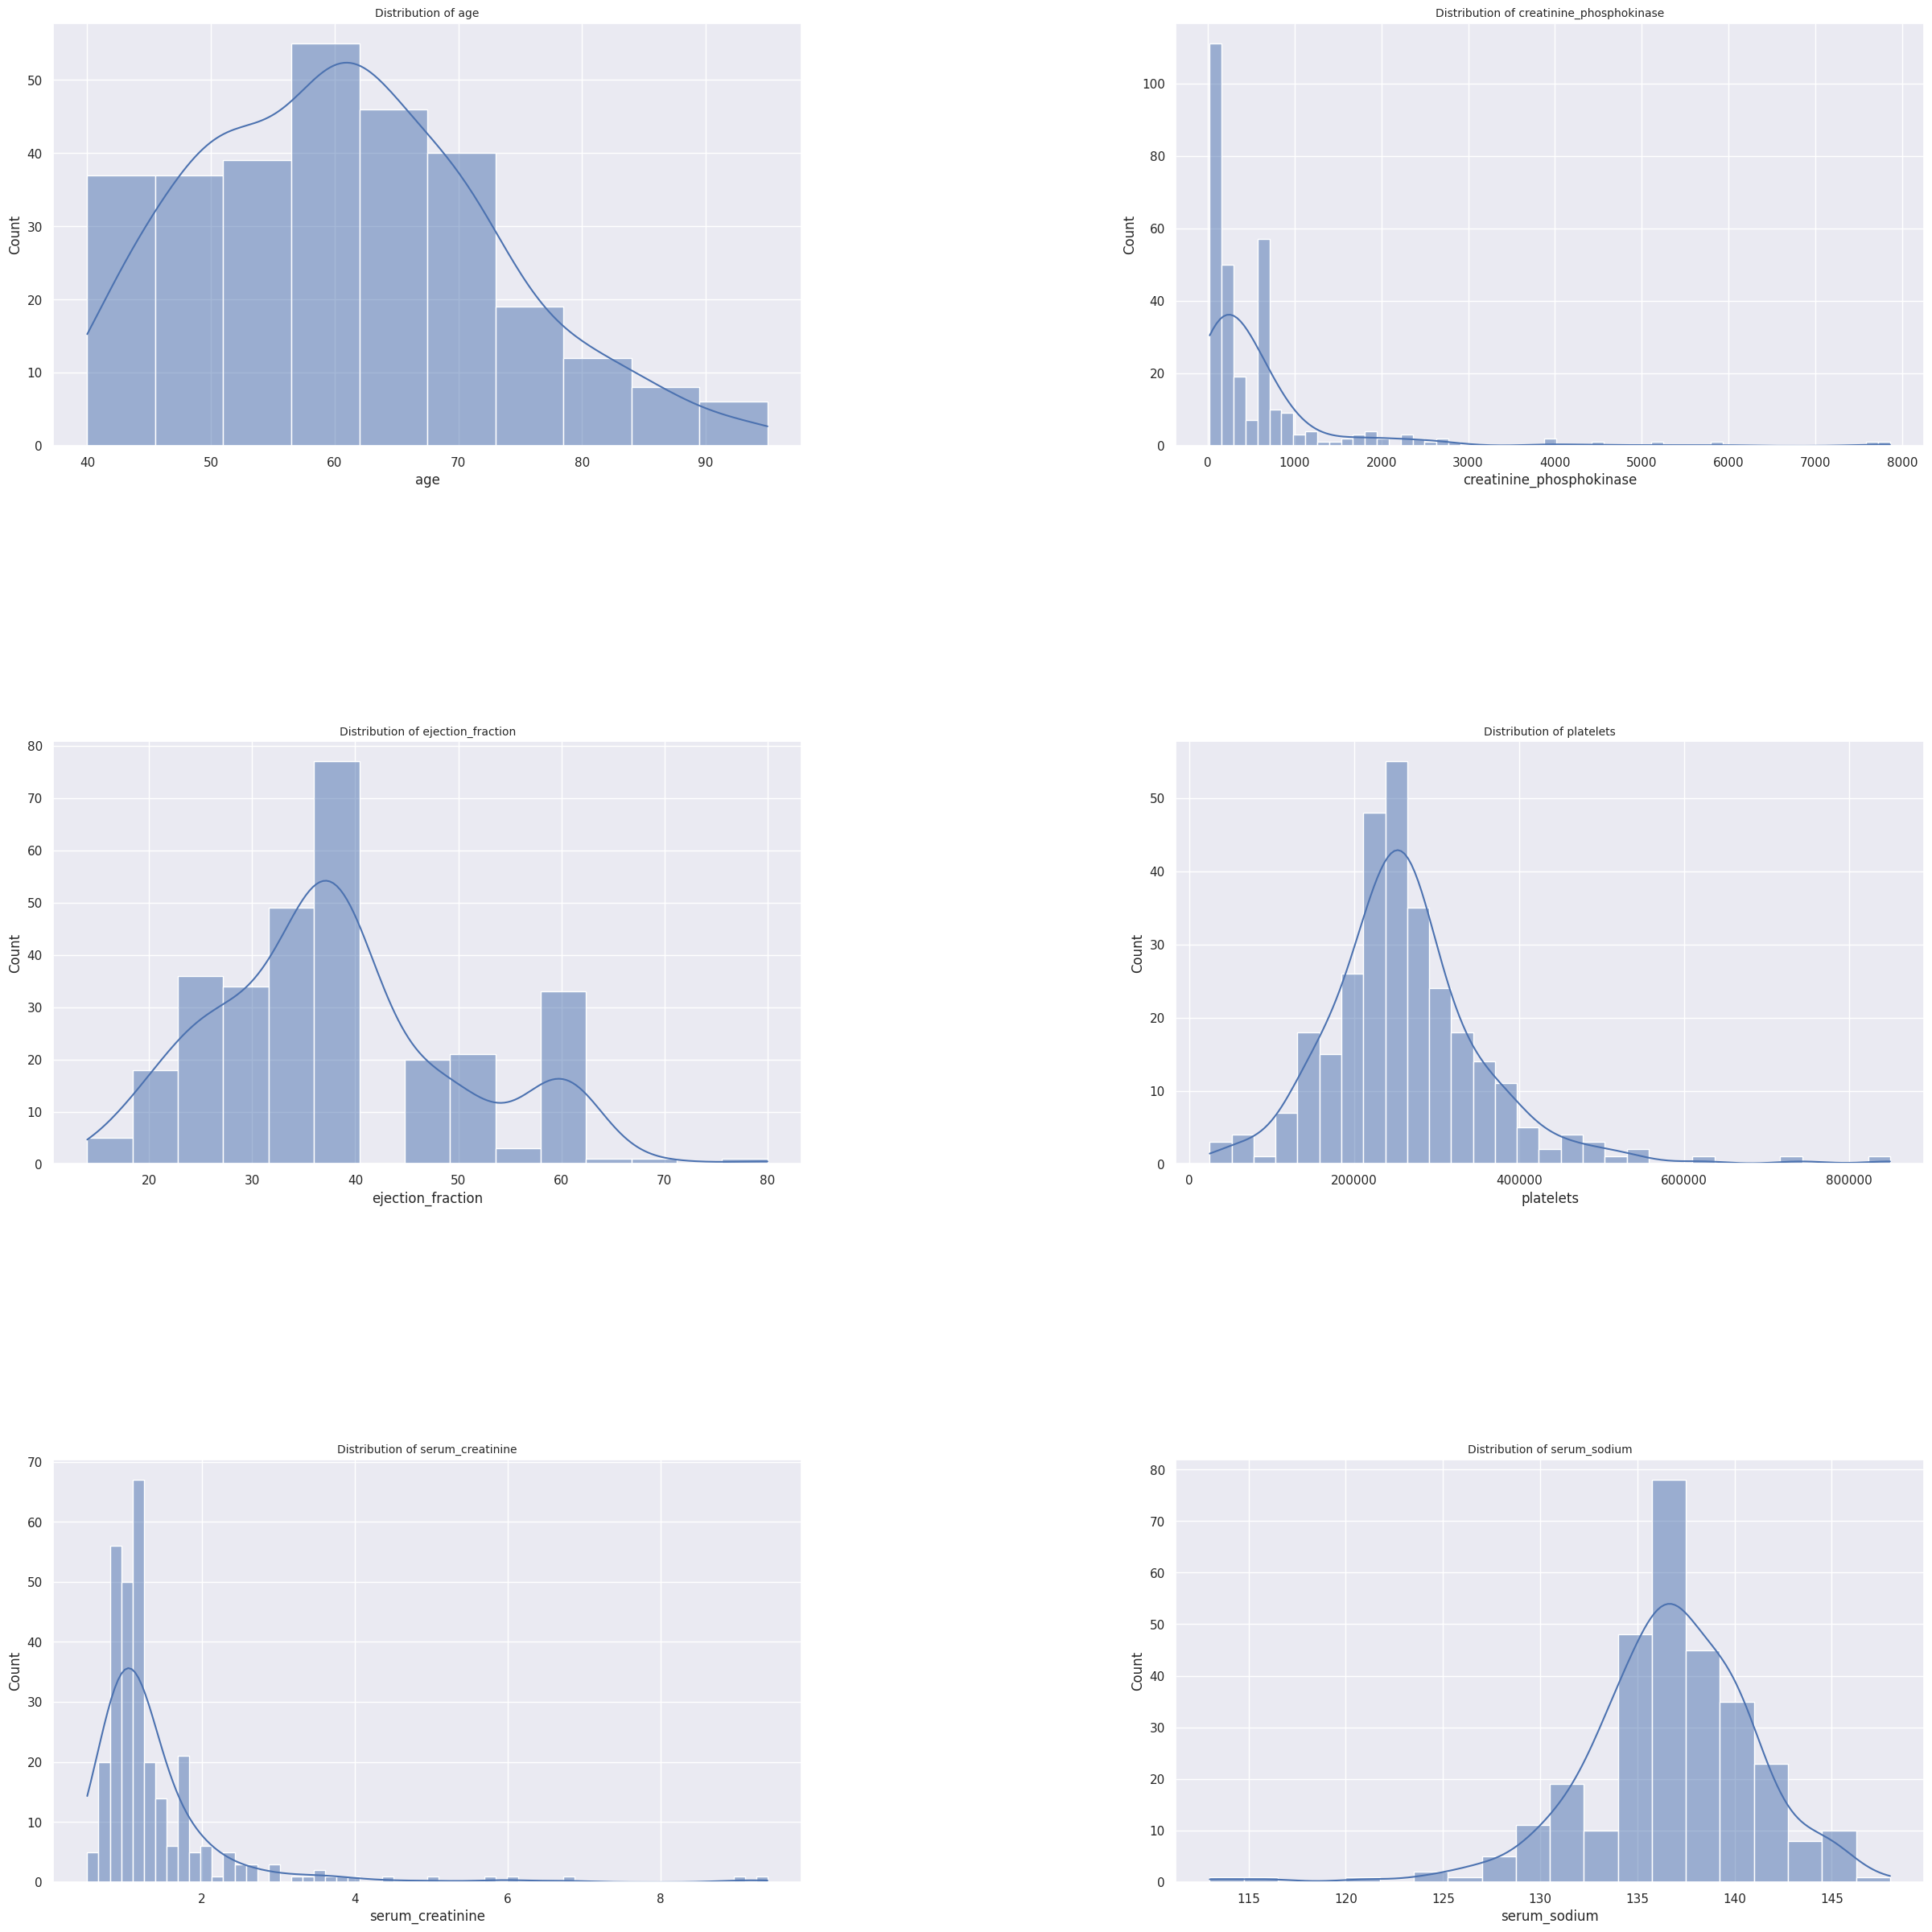

In [8]:
fig = plt.figure(figsize=(30,30))
fig.subplots_adjust(hspace=0.7, wspace=0.5)

dist1  = ['age','creatinine_phosphokinase', 'ejection_fraction',
        'platelets', 'serum_creatinine', 'serum_sodium']

def stacked_dist(df, columns):
        length = len(columns)
        if length % 2 == 0:
                row = length // 2
        else:
                row = length // 2 + 1
        odd = 1
        even = 2
        for i in range(0, length, 2):
                if i < length - 1:
                        ax1 = fig.add_subplot(row, 2, odd)
                        sns.histplot(df[columns[i]],kde=True)
                        ax1.set_title(f"Distribution of {columns[i]}", fontsize=10)
                        odd += 2

                        ax2 = fig.add_subplot(row, 2, even)
                        sns.histplot(df[columns[i + 1]], kde=True)
                        ax2.set_title(f"Distribution of {columns[i + 1]}", fontsize=10)
                        even += 2
        plt.show()

stacked_dist(df, dist1)

In [9]:
central_tendency = pd.DataFrame({'Kolom':dist1,
                                 'Mean':[df[i].mean()  for i in dist1],
                                'Median':[df[i].median()  for i in dist1],
                                'Modus': [df[i].mode()[0]  for i in dist1],
                                'p-value': [normal_ad(df[i])[1] for i in dist1],
                                'skewness': [skew(df[i]) for i in dist1]})
central_tendency['check'] = central_tendency['p-value']<0.05
central_tendency['skew'] = np.where(central_tendency['Mean']< central_tendency['Median'], 'Left skewed', 'Right skewed')
central_tendency

,Kolom,Mean,Median,Modus,p-value,skewness,check,skew
0,age,60.833893,60.000000,60.000000,0.000317,0.420937,True,Right skewed
1,creatinine_phosphokinase,581.839465,250.000000,582.000000,0.000000,4.440689,True,Right skewed
2,ejection_fraction,38.083612,38.000000,35.000000,0.000000,0.552593,True,Right skewed
3,platelets,263358.029264,262000.000000,263358.030000,0.000000,1.454975,True,Right skewed
4,serum_creatinine,1.393880,1.100000,1.000000,0.000000,4.433610,True,Right skewed
5,serum_sodium,136.625418,137.000000,136.000000,0.000000,-1.042870,True,Left skewed


$H_0$ ditolak karena p-value dari setiap kolom diatas lebih kecil dari 0.05. Maka dari itu diketahui bahwa kolom age, creatinine_phosphokinasi, ejection fraction, platelets, serum_creatinine, dan serum_sodium tidak terdistribusi secara normal.

### Outliers Checking

Dari data di atas, akan dilakukan pengecekan outliers untuk kolom numerikal

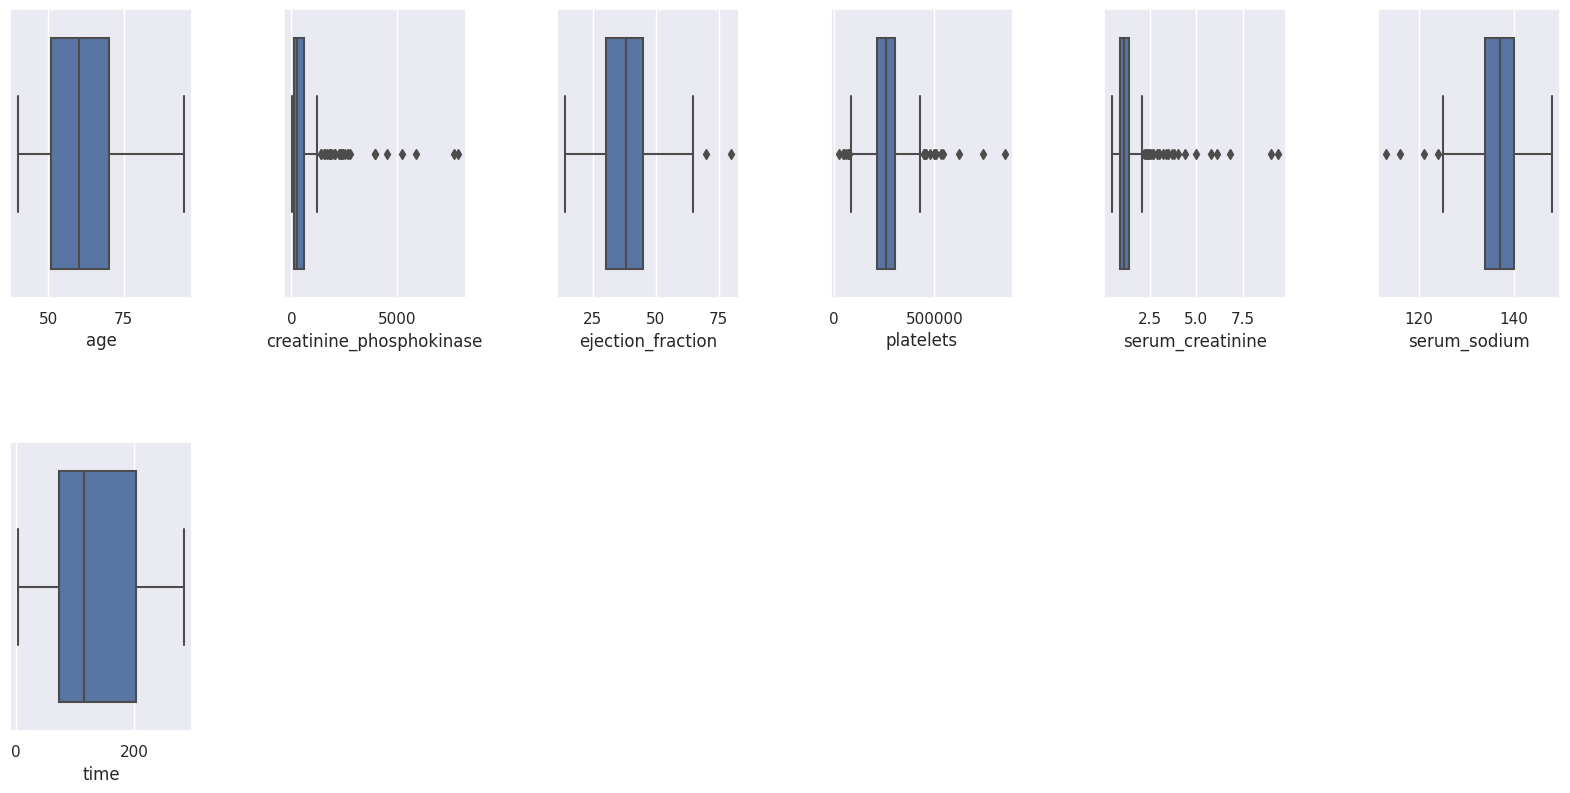

In [10]:
fig = plt.figure(figsize=(20, 15))
fig.subplots_adjust(hspace=.5, wspace=.5)

ax = fig.add_subplot(3,6,1)
sns.boxplot(x=df['age'])

ax = fig.add_subplot(3,6,2)
sns.boxplot(x=df['creatinine_phosphokinase'])

ax = fig.add_subplot(3,6,3)
sns.boxplot(x=df['ejection_fraction'])

ax = fig.add_subplot(3,6,4)
sns.boxplot(x=df['platelets'])

ax = fig.add_subplot(3,6,5)
sns.boxplot(x=df['serum_creatinine'])

ax = fig.add_subplot(3,6,6)
sns.boxplot(x=df['serum_sodium'])

ax = fig.add_subplot(3,6,7)
sns.boxplot(x=df['time'])

plt.show()

Didapatkan outlier untuk kolom creatinine, ejection fraction, platelets, serum_creatinine dan serum_sodium.

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
print(Q1)
print(Q3)

age                            51.000000
anaemia                         0.000000
creatinine_phosphokinase      116.500000
diabetes                        0.000000
ejection_fraction              30.000000
high_blood_pressure             0.000000
platelets                  212500.000000
serum_creatinine                0.900000
serum_sodium                  134.000000
sex                             0.000000
smoking                         0.000000
time                           73.000000
DEATH_EVENT                     0.000000
Name: 0.25, dtype: float64
age                            70.000000
anaemia                         1.000000
creatinine_phosphokinase      582.000000
diabetes                        1.000000
ejection_fraction              45.000000
high_blood_pressure             1.000000
platelets                  303500.000000
serum_creatinine                1.400000
serum_sodium                  140.000000
sex                             1.000000
smoking                       

In [12]:
IQR = Q3-Q1
print(IQR)

age                           19.000000
anaemia                        1.000000
creatinine_phosphokinase     465.500000
diabetes                       1.000000
ejection_fraction             15.000000
high_blood_pressure            1.000000
platelets                  91000.000000
serum_creatinine               0.500000
serum_sodium                   6.000000
sex                            1.000000
smoking                        1.000000
time                         130.000000
DEATH_EVENT                    1.000000
dtype: float64


In [13]:
len((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR)))

299

Karena terdapat 299 data outlier dari 299 jumlah row data, maka outlier tidak akan dibuang.

## E. EDA

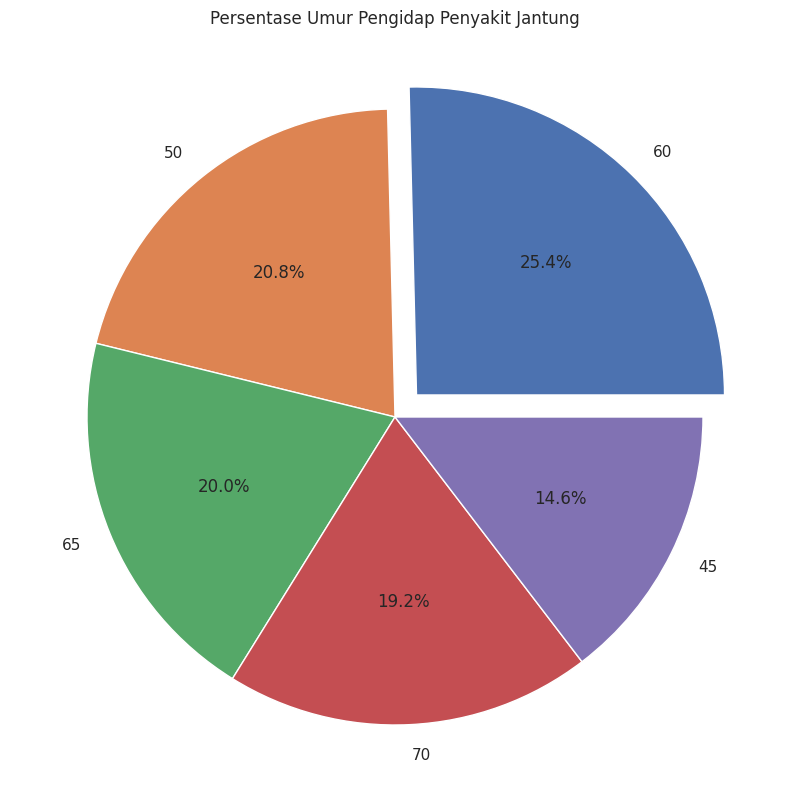

In [14]:
grouped = df.groupby(['age'])['age'].value_counts().sort_values(ascending=False).head(5)
label=['60', '50', '65', '70', '45']
explode=[0.1,0,0,0,0]
plt.figure(figsize=(10,10))
plt.pie(grouped, labels=label,autopct='%1.1f%%',explode=explode)
plt.title('Persentase Umur Pengidap Penyakit Jantung')
plt.show()

Pengidap penyakit jantung terbanyak adalah pasien dengan umur 60 sebesar 26.5% dan kedia terbesar adalah pasien dengan umur 50 dengan persentase sebesar 20.5%

In [15]:
grouped2 = df[['age','diabetes']].groupby(['age'], as_index=False).agg({'diabetes':'sum'})
grouped2

,age,diabetes
0,40.000000,2
1,41.000000,0
2,42.000000,2
3,43.000000,0
4,44.000000,2
5,45.000000,11
6,46.000000,1
7,47.000000,0
8,48.000000,2
9,49.000000,1


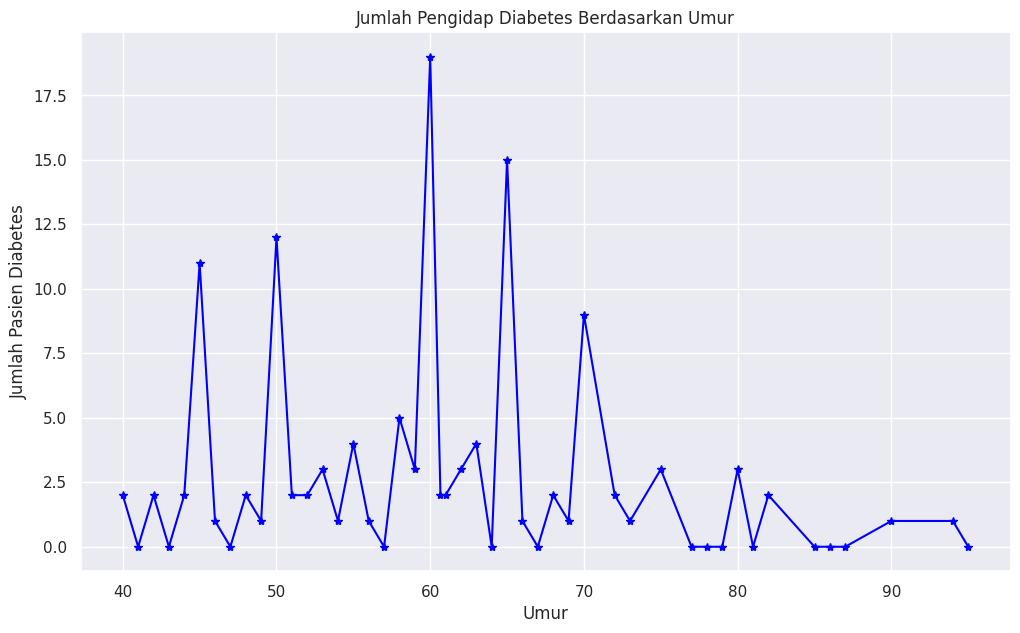

In [16]:
grouped2.plot(kind='line',
                x='age',
                y='diabetes',
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Jumlah Pengidap Diabetes Berdasarkan Umur")
plt.xlabel("Umur")
plt.ylabel("Jumlah Pasien Diabetes")

plt.show()

Dari visualisasi diatas, dapat dilihat bahwa pengidap diabetes berdasarkan umur fluktuatif. Pengidap diabetes terbanyak adalah pasien dengan umur 60 tahun dengan jumlah 19 pasien.

In [17]:
grouped3 = df[['age','high_blood_pressure']].groupby(['age'], as_index=False).agg({'high_blood_pressure':'sum'})
grouped3

,age,high_blood_pressure
0,40.000000,1
1,41.000000,0
2,42.000000,0
3,43.000000,0
4,44.000000,2
5,45.000000,5
6,46.000000,2
7,47.000000,0
8,48.000000,1
9,49.000000,3


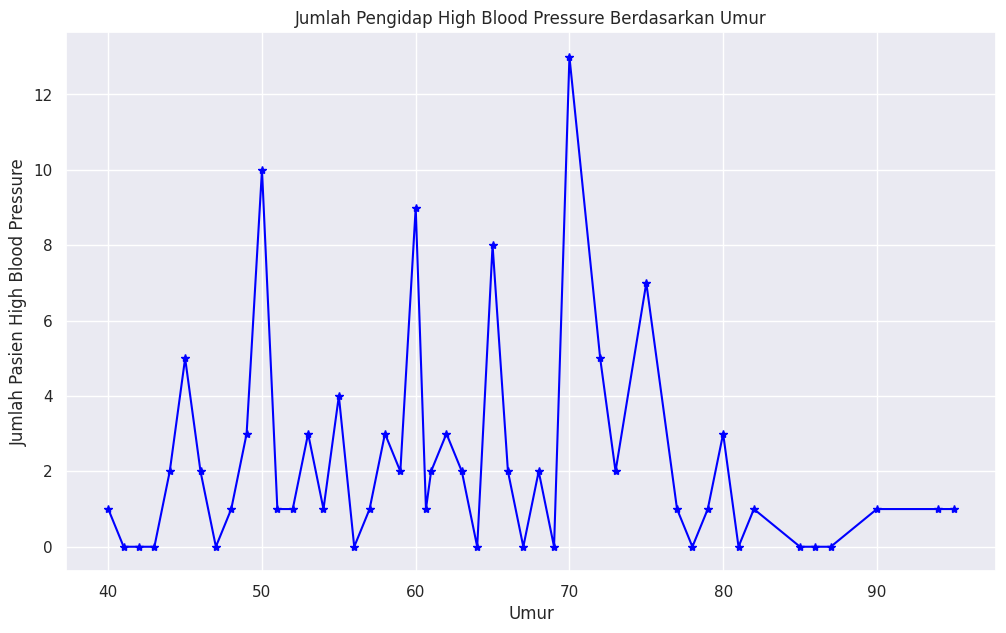

In [18]:
grouped3.plot(kind='line',
                x='age',
                y='high_blood_pressure',
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Jumlah Pengidap High Blood Pressure Berdasarkan Umur")
plt.xlabel("Umur")
plt.ylabel("Jumlah Pasien High Blood Pressure")

plt.show()

Dari visualisasi diatas, dapat dilihat bahwa pasien pengidap penyakit jantung dengan high blood pressure terbanyak adalah pasien umur 70 tahun dengan jumlah 13 pasien.

In [19]:
grouped4 = df[['age','anaemia']].groupby(['age'], as_index=False).agg({'anaemia':'sum'})
grouped4

,age,anaemia
0,40.000000,2
1,41.000000,0
2,42.000000,2
3,43.000000,1
4,44.000000,0
5,45.000000,4
6,46.000000,1
7,47.000000,0
8,48.000000,2
9,49.000000,2


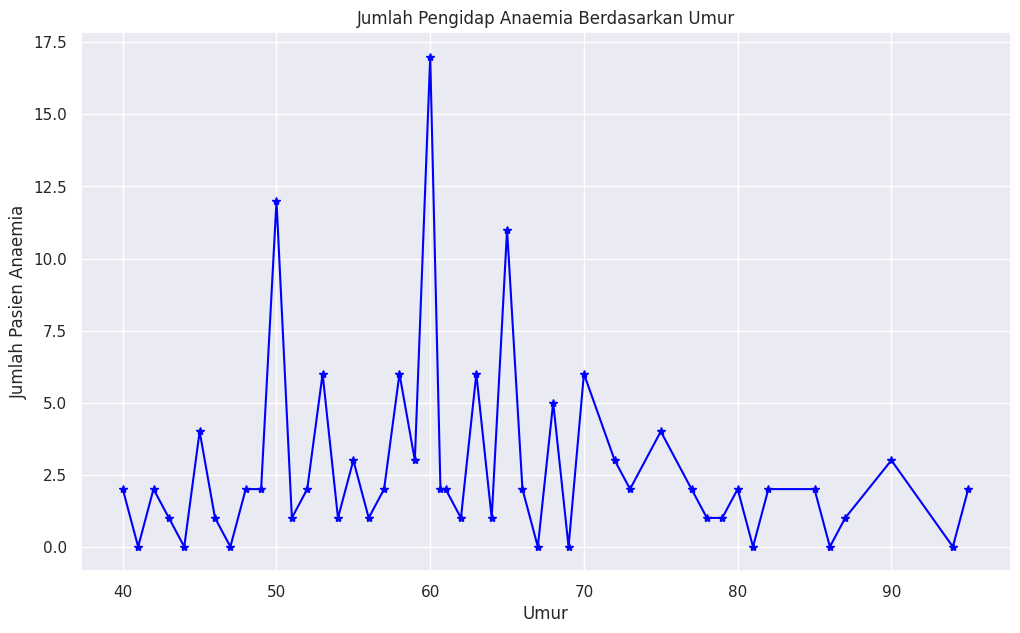

In [20]:
grouped4.plot(kind='line',
                x='age',
                y='anaemia',
                figsize=(12,7),
                color='blue',
                legend = False,
                marker="*")
plt.title("Jumlah Pengidap Anaemia Berdasarkan Umur")
plt.xlabel("Umur")
plt.ylabel("Jumlah Pasien Anaemia")

plt.show()

Dari visualisasi diatas, dapat dilihat bahwa umur pasien 60 memiliki anemia terbanyak dengan jumlah pasien sebesar 17

Text(0.5, 1.0, 'Diabetes vs Smoking')

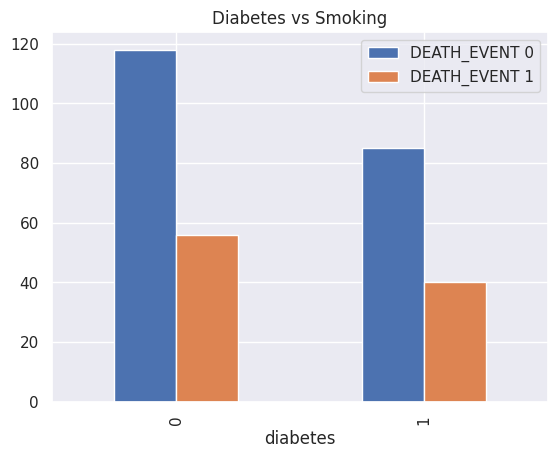

In [21]:
grouped5 = df[['diabetes', 'DEATH_EVENT']].groupby(['diabetes', 'DEATH_EVENT']).agg({'diabetes': 'count'})
grouped5.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Diabetes vs Smoking')

Dari visualisasi di atas, dapat dilihat bahwa pasien yang tidak memiliki diabetes lebih banyak yang tidak meninggal dibandingkan pasien yang tidak memiliki diabetes. Namun pasien yang tidak memiliki diabetes lebih banyak yang meninggal dibandingkan orang yang memiliki diabetes.

Text(0.5, 1.0, 'Anaemia vs Smoking')

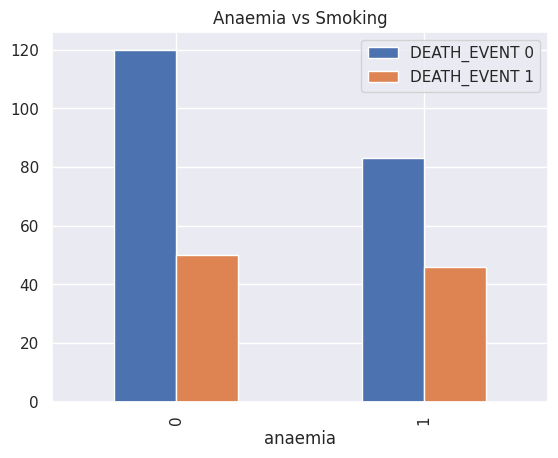

In [22]:
grouped6 = df[['anaemia', 'DEATH_EVENT']].groupby(['anaemia', 'DEATH_EVENT']).agg({'anaemia': 'count'})
grouped6.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Anaemia vs Smoking')

Dapat dilihat bahwa pasien yang tidak memiliki anemia lebih banyak yang tidak meninggal dibandingkan pasen yang meninggal. Namun pasien yang tidak memiliki anemia lebih banyak yang meninggal dibandingkan pasien yang memiliki anemia.

Text(0.5, 1.0, 'Death Event vs Smoking')

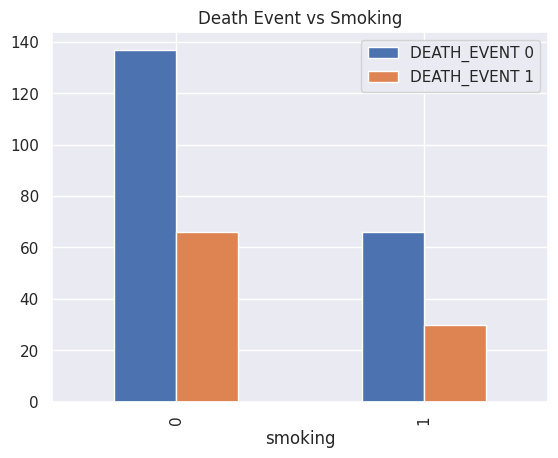

In [23]:
grouped6 = df[['smoking', 'DEATH_EVENT']].groupby(['smoking', 'DEATH_EVENT']).agg({'DEATH_EVENT': 'count'})
grouped6.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Death Event vs Smoking')

Dapat dilihat diatas bahwa pasien yang tidak merokok lebih banyak yang meninggal dibandingkan pasien yang tidak merokok. Namun, pasien yang merokok lebih sedikit yang hidup dibandingkan pasien yang tidak merokok.

Text(0.5, 1.0, 'Gender vs Smoking')

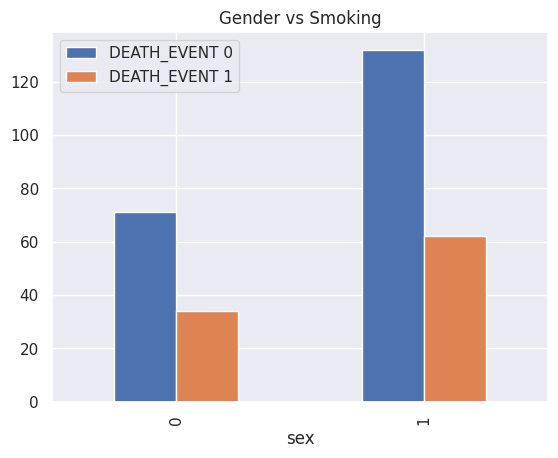

In [24]:
grouped7 = df[['sex', 'DEATH_EVENT']].groupby(['sex', 'DEATH_EVENT']).agg({'sex': 'count'})
grouped7.unstack().plot(kind='bar')
plt.legend(['DEATH_EVENT 0','DEATH_EVENT 1'])
plt.title('Gender vs Smoking')

Dapat dilihat bahwa pasien dengan gender laki-laki yang meninggal akibat penyakit jantung lebih sedikit dibandingkan wanita. Namum pasien wanita lebih banyak yang tidak meninggal dibandingkan pasien laki laki.

### Data Correlation

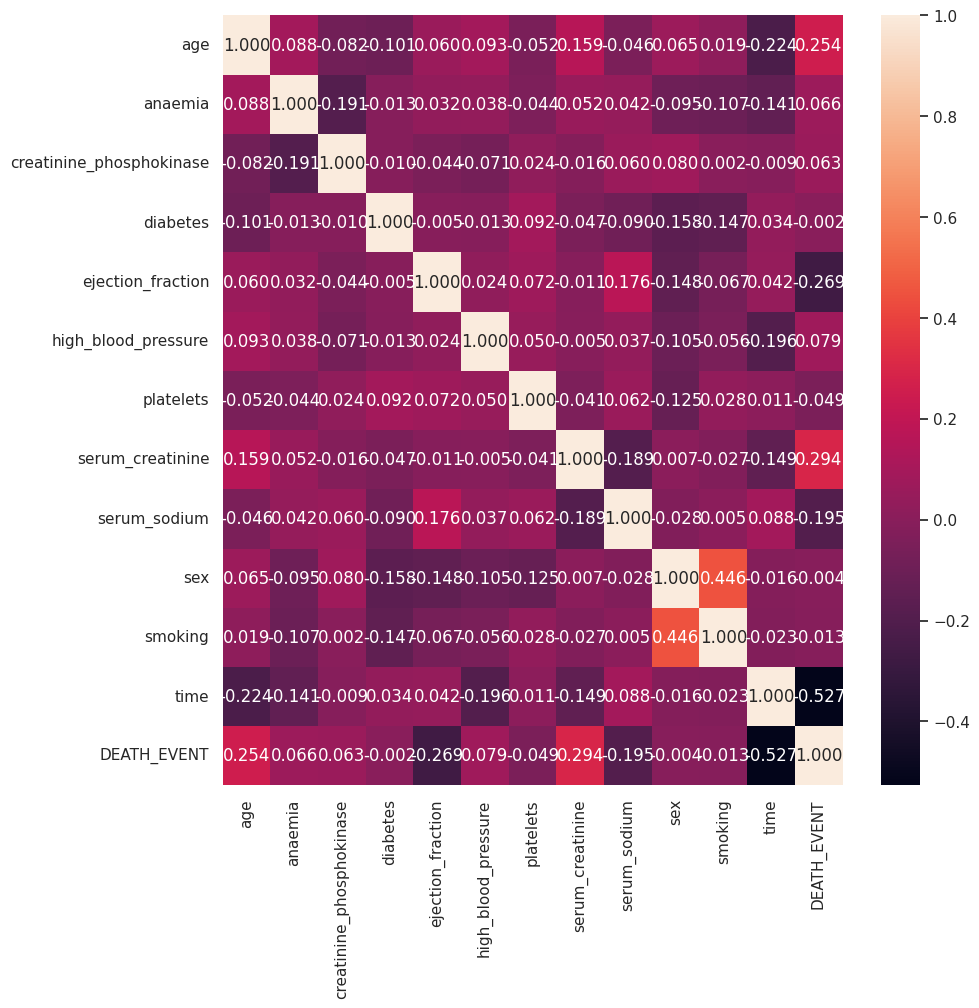

In [25]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

Dari heatmap diatas, didapatkan bahwa korelasi tertinggi adalah antara time dan Death Event. Dari sana diapatkan bahwa semakin sedikit waktu dalam hari untuk follow-up pasien, kemungkinan pasien meinggal akan semakin kecil. Korelasi terbesar kedia adalah antara sex dan smoking.
## F. Data Preprocessing

In [26]:
train, test = train_test_split(df, test_size=0.25, random_state=11)
train_index = train.index
test_index = test.index

In [27]:
y_train = train[['DEATH_EVENT']]
x_train = train.drop(['DEATH_EVENT'], axis=1)
y_test = test[['DEATH_EVENT']]
x_test = test.drop(['DEATH_EVENT'], axis=1)

## G. Pendefinisian dan Pelatihan Model

## Random Forest Model

In [28]:
rf = RandomForestClassifier(max_features = 0.5, max_depth =5, random_state=42)
rf.fit(x_train, y_train)

<ipython-input-28-cb1f8c0a8ee4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=5, max_features=0.5, random_state=42)

### Evaluasi Model

In [29]:
train_y_pred = rf.predict(x_train)
test_y_pred = rf.predict(x_test)

accuracy_train = metrics.accuracy_score(y_train, train_y_pred)
accuracy_test = metrics.accuracy_score(y_test, test_y_pred)
print('Train Accuracy:', metrics.accuracy_score(y_train, train_y_pred))
print('Test Accuracy:', metrics.accuracy_score(y_test, test_y_pred))

Train Accuracy: 0.9553571428571429
Test Accuracy: 0.8933333333333333


In [30]:
print(classification_report(y_test, test_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.88      0.81      0.84        26

    accuracy                           0.89        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.89      0.89      0.89        75



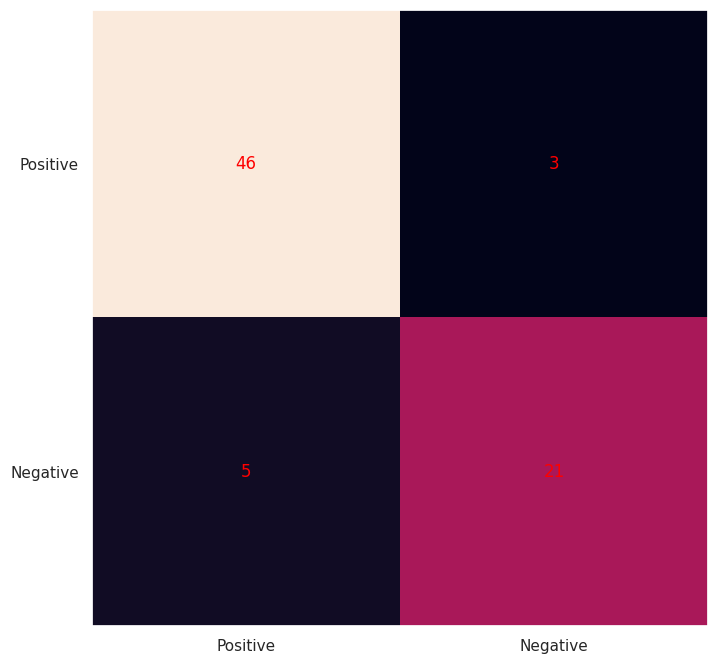

In [31]:
cm = confusion_matrix(y_test, test_y_pred)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Akurasi yang didapatkan dari model random forest diatas adalah sebesar 95.54% untuk training data. Namun, akurasi yang didapatkan untuk testing data adalah sebesar 89.33%. Maka dari itu, model diatas termasuk overfitting. Selain itu, nilai True Positive dan True Negative lebih besar dibandingkan False Positive dan False Negative sehingga model ini sudah cukup baik.

### Random Forest dengan Melakukan Hyperparameter Tuning

In [32]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000]}

In [33]:
rf1 = RandomForestClassifier(random_state=42)
rf_tuned = GridSearchCV(estimator=rf1, param_grid=param_grid,
                         cv=3, n_jobs=-1, verbose=2)
rf_tuned.fit(x_train, y_train)
rf_tuned.best_estimator_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [34]:
rf_tuned_model = RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)
rf_tuned_model.fit(x_train, y_train)

<ipython-input-34-df3027e30686>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tuned_model.fit(x_train, y_train)


RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [35]:
train_pred_y_tune = rf_tuned_model.predict(x_train)
test_pred_y_tune = rf_tuned_model.predict(x_test)

In [36]:
accuracy_tune_train = metrics.accuracy_score(y_train, train_pred_y_tune)
accuracy_tune_test = metrics.accuracy_score(y_test, test_pred_y_tune)
print('Train Accuracy:', metrics.accuracy_score(y_train, train_pred_y_tune))
print('Test Accuracy:', metrics.accuracy_score(y_test, test_pred_y_tune))

Train Accuracy: 0.9107142857142857
Test Accuracy: 0.92


In [37]:
print(classification_report(y_test, test_pred_y_tune))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.92      0.85      0.88        26

    accuracy                           0.92        75
   macro avg       0.92      0.90      0.91        75
weighted avg       0.92      0.92      0.92        75



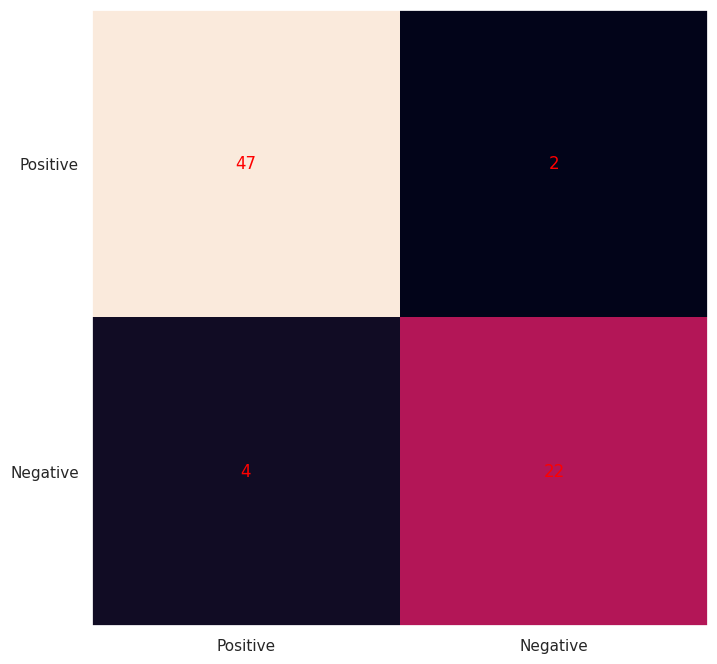

In [38]:
cm = confusion_matrix(y_test, test_pred_y_tune)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

Setelah dilakukan hyperparameter tuning, didapatkan akurasi 91% pada training data dan sebesar 92% pada testing data dengan model terbaik adalah :</br></br>
**RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, random_state=42)**</br></br>
Karena testing data lebih besar dibandingkan training data, maka model ini termasuk underfitting. Tetapi dari confusion matrix diatas, nilai True Positive dan True Negative lebih besar dibandingkan nilai False Positive dan False Negative sehingga model dapat dikatakan sudah cukup baik.

In [39]:
compared = pd.DataFrame({'Keterangan':['Testing Data','Tuned Testing Data'],
                        'Accuracy':[accuracy_test, accuracy_tune_test]})
compared

,Keterangan,Accuracy
0,Testing Data,0.893333
1,Tuned Testing Data,0.920000


Dari perbandingan diatas, didapatkan akurasi testing data setelah dilakukan hyperparameter tuning lebih tinggi dibandingkan sebelum dilakukan hyperparameter tuning. Karena itu, akan dilakukan model inference dan model deployment dengan menggunakan model random forest setelah hyperparameter tuning.

## H. Kesimpulan

- Data set di atas terdiri dari 12 fitur yang digunakan untuk memprediksi kematian akibat gagal jantung.
- Setiap kolom dari dataset tidak terdistribusi secara normal.
- Didapatkan bahwa pasien pengidap penyakit jantung terbanyak adalah pasien dengan umur 60 tahun dengan persentase sebear 26.5%.
- Berdasarkan umur, pasien Diabetes terbanyak adalah pasien dengan umur 60 tahun sebanyak 19 pasien. Sedangkan pasien dengan high blood pressure terbanyak adalah pasien dengan umur 70 tahun dengan jumlah 13 pasien. Pasien dengan Anemia terbanyak adalah pada pasien dengan umur 60 tahun dengan jumlah pasien sebesar 17.
- Model Random Forest sebelum menggunakan Hyperparameter Tuning mendapatkan akurasi training sebesar 95.54% dan akurasi pada testing data sebesar 89.33%. Sedangkan model Random Forest setelah dilakukan Hyperparameter Tuning adalah sebesar 91% untuk training data dan 91% untuk testing data.

## I. Model Inference and Deployment

In [40]:
with open("randomforest.pkl","wb") as f:
    pickle.dump(rf,f)

In [41]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(rf_tuned_model)

pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=50, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

In [42]:
with open("pipeline.pkl","wb") as f:
    pickle.dump(pipe,f)

In [43]:
y_pred = pipe.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        49
           1       0.92      0.85      0.88        26

    accuracy                           0.92        75
   macro avg       0.92      0.90      0.91        75
weighted avg       0.92      0.92      0.92        75



In [44]:
inference = pd.DataFrame({'age':[50,63,90,40,47],
                     'anaemia':[0,1,0,0,1,],
                    'creatinine_phosphokinase':[581, 6542, 851, 630, 3672],
                    'diabetes':[1,0,1,1,0],
                    'ejection_fraction':[15, 34, 65, 41, 73],
                    'high_blood_pressure':[0,0,1,0,1],
                    'platelets':[225000.00,450000.00, 730200.00, 670500.00, 503000.00],
                    'serum_creatinine':[0.7, 8.7, 5.6, 3.5, 2.9],
                    'serum_sodium':[135, 137, 116, 147, 120],
                    'sex':[1,1,0,1,0],
                    'smoking':[0,0,1,0,0],
                    'time':[247, 57, 10, 156, 96]})
inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,50,0,581,1,15,0,225000.000000,0.700000,135,1,0,247
1,63,1,6542,0,34,0,450000.000000,8.700000,137,1,0,57
2,90,0,851,1,65,1,730200.000000,5.600000,116,0,1,10
3,40,0,630,1,41,0,670500.000000,3.500000,147,1,0,156
4,47,1,3672,0,73,1,503000.000000,2.900000,120,0,0,96


In [45]:
y_pred = rf_tuned_model.predict(inference)
inference['prediciton'] = y_pred
inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,prediciton
0,50,0,581,1,15,0,225000.000000,0.700000,135,1,0,247,0
1,63,1,6542,0,34,0,450000.000000,8.700000,137,1,0,57,1
2,90,0,851,1,65,1,730200.000000,5.600000,116,0,1,10,1
3,40,0,630,1,41,0,670500.000000,3.500000,147,1,0,156,0
4,47,1,3672,0,73,1,503000.000000,2.900000,120,0,0,96,0
